**Transformers**

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers

In [2]:
BaseModel = VGG16(include_top = False,weights ="imagenet",input_tensor = layers.Input(shape = (224,224,3)))

58889256/58889256 [==============================] - 1s 0us/step


In [21]:
BaseModel

In [3]:
net = models.Sequential([BaseModel,
                         layers.AveragePooling2D(pool_size=(4,4)),
                         layers.Flatten(),
                         layers.Dense(300,activation="relu"),
                         layers.Dense(40,activation="relu"),
                         layers.Dense(2,activation="softmax")
                            ])

for layer in BaseModel.layers:
  layer.trainable = False

In [4]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 average_pooling2d (AverageP  (None, 1, 1, 512)        0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 300)               153900    
                                                                 
 dense_1 (Dense)             (None, 40)                12040     
                                                                 
 dense_2 (Dense)             (None, 2)                 82        
                                                        

showing the structure of model

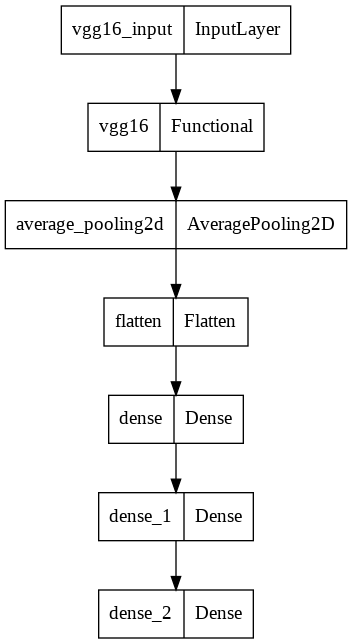

In [5]:
from keras.utils import plot_model
plot_model(net)

Functional API

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 flatten_9 (Flatten)            (None, 150528)       0           ['input_9[0][0]']                
                                                                                                  
 dense_18 (Dense)               (None, 300)          45158700    ['flatten_9[0][0]']              
                                                                                                  
 dense_19 (Dense)               (None, 300)          90300       ['dense_18[0][0]']         

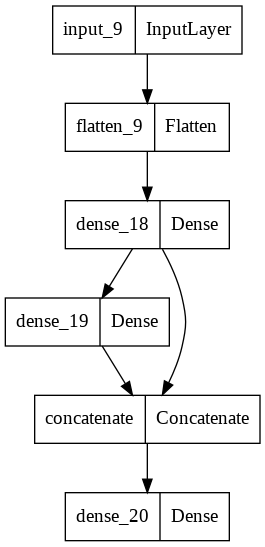

In [28]:
from tensorflow.keras import models, layers

visible = layers.Input(shape=(224,224,3))
pool = layers.AveragePooling2D(pool_size=(4,4))(visible)
Flatten = layers.Flatten()(visible)
hidden1 = layers.Dense(300,activation="relu")(Flatten)
hidden2 = layers.Dense(300,activation="relu")(hidden1)
merge = layers.concatenate([hidden1,hidden2])
output = layers.Dense(2,activation="softmax")(merge)
model = models.Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')